In [1]:
# Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Membaca Gambar
img = cv2.imread("utsprak.jpg")

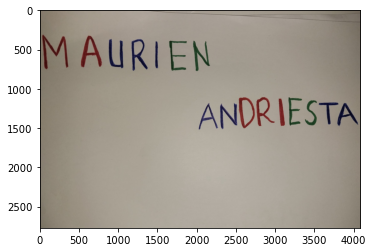

In [3]:
# Menampilkan Gambar
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [4]:
# Citra Kontras
(baris, kolom)= rgb.shape[:2]

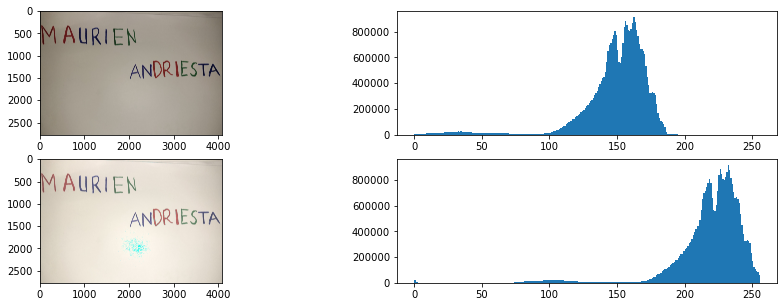

In [5]:
beta = 70 #bias untuk kecerahan
citra_cerah = np.zeros((baris, kolom, 3)) #np zeros = mengubah semua elemen array menjadi 0
 
for x in range(baris) :
    for y in range(kolom) :
        gyx = rgb[x,y] + beta
        
        citra_cerah[x,y] = gyx
citra_cerah = citra_cerah.astype(np.uint8)
 
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(rgb)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

(-0.5, 4079.5, 2769.5, -0.5)

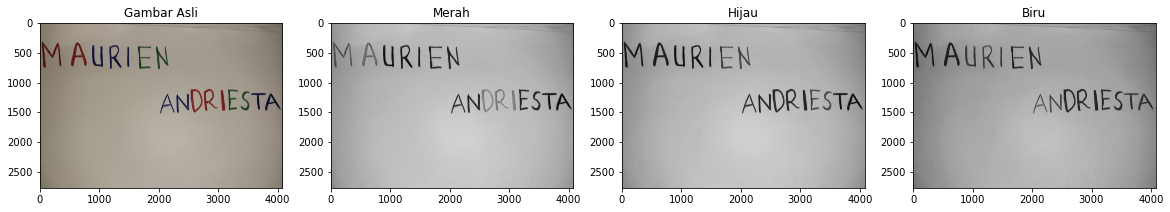

In [39]:
# Citra kontras menampilkan warna
r = img[:, :, 2] 
g = img[:, :, 1] 
b = img[:, :, 0]

f, (c1, c2, c3, c4) = plt.subplots(1,4, figsize = (20,10))

c1.set_title('Gambar Asli')
c1.imshow(rgb)
c1.axis('on')

c2.set_title('Merah') 
c2.imshow(r, cmap="gray") 
c2.axis('on')

c3.set_title('Hijau') 
c3.imshow(g, cmap="gray") 
c3.axis('on')

c4.set_title('Biru') 
c4.imshow(b, cmap="gray")
c4.axis('on')

Text(0.5, 1.0, 'RED-GREEN-BLUE')

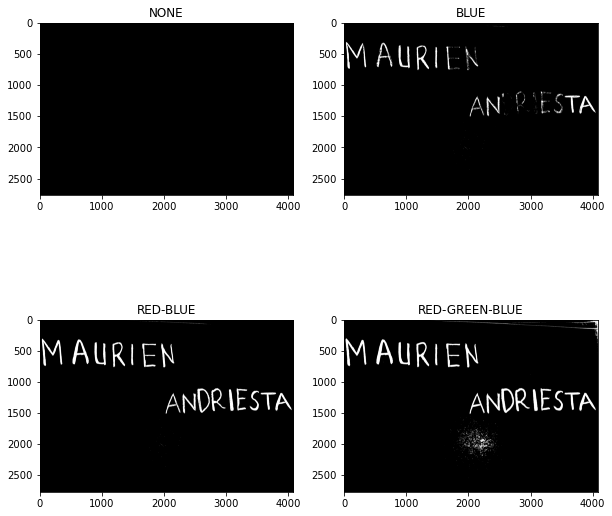

In [28]:
# Ambang batas
gray = cv2.cvtColor(citra_cerah, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

(thresh, binary2) = cv2.threshold(gray, 120, 256, cv2.THRESH_BINARY)
axs[0,1].imshow(binary2, cmap = 'binary')
axs[0,1].set_title('BLUE')

(thresh, binary3) = cv2.threshold(gray, 145, 256, cv2.THRESH_BINARY)
axs[1,0].imshow(binary3, cmap = 'binary')
axs[1,0].set_title('RED-BLUE')

(thresh, binary4) = cv2.threshold(gray, 180, 256, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap = 'binary')
axs[1,1].set_title('RED-GREEN-BLUE')

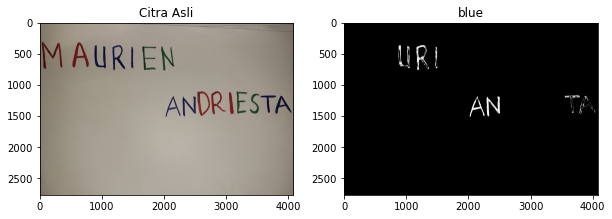

In [45]:
# Ambang batas Blue
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tentukan batas atas dan batas bawah untuk warna biru dalam ruang warna HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Buat mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Terapkan mask pada citra asli
hasil = cv2.bitwise_and(img, img, mask=mask)

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('blue')

plt.show()

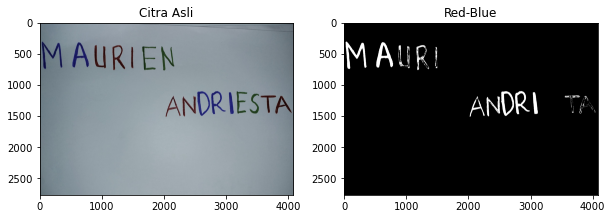

In [47]:
# Ambang Red Blue
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Tentukan batas atas dan batas bawah untuk warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Buat mask untuk warna biru dan merah
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Gabungkan mask biru dan mask merah
mask_combined = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined = cv2.bitwise_or(mask_combined, mask_red2)

# Terapkan mask pada citra asli
hasil = cv2.bitwise_and(img, img, mask=mask_combined)

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined, cmap='gray')
axs[1].set_title('Red-Blue')

plt.show()

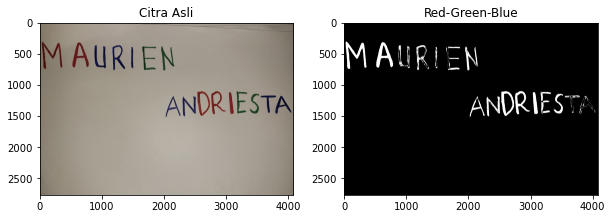

In [48]:
# Ambang Red Green Blue
# Konversi citra ke ruang warna HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tentukan batas atas dan batas bawah untuk warna biru dalam ruang warna HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Tentukan batas atas dan batas bawah untuk warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Tentukan batas atas dan batas bawah untuk warna hijau dalam ruang warna HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Buat mask untuk warna biru, merah, dan hijau
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Gabungkan mask biru, merah, dan hijau menggunakan operasi bitwise OR
mask_combined = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined = cv2.bitwise_or(mask_combined, mask_red2)
mask_combined = cv2.bitwise_or(mask_combined, mask_green)

# Terapkan mask pada citra asli
hasil = cv2.bitwise_and(img, img, mask=mask_combined)

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined, cmap='gray')
axs[1].set_title('Red-Green-Blue')

plt.show()

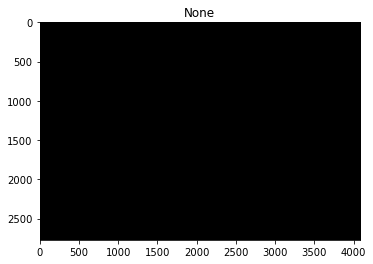

In [49]:
# Ambang None
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('on')
    plt.show()

# Load gambar dalam format HSV
hsv_image = cv2.imread('utsprak.jpg', cv2.IMREAD_COLOR)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_BGR2HSV)

# Tentukan rentang warna biru dalam HSV
lower_blue = np.array([100, 50, 50])    # Ambang bawah warna biru (dalam HSV)
upper_blue = np.array([130, 255, 255])  # Ambang atas warna biru (dalam HSV)

# Tentukan rentang warna merah dalam HSV
lower_red1 = np.array([0, 50, 50])      # Ambang bawah warna merah (dalam HSV)
upper_red1 = np.array([10, 255, 255])   # Ambang atas warna merah (dalam HSV)

lower_red2 = np.array([170, 50, 50])    # Ambang bawah warna merah (dalam HSV) untuk nilai yang melintasi 180
upper_red2 = np.array([180, 255, 255])  # Ambang atas warna merah (dalam HSV) untuk nilai yang melintasi 180

# Tentukan rentang warna hijau dalam HSV
lower_green = np.array([50, 50, 50])     # Ambang bawah warna hijau (dalam HSV)
upper_green = np.array([80, 255, 255])   # Ambang atas warna hijau (dalam HSV)

# Buat mask untuk menangkap piksel biru, merah, dan hijau dalam rentang tersebut
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Gabungkan mask untuk biru, merah, dan hijau
red_blue_mask = cv2.bitwise_or(red_mask1, red_mask2)
combined_mask = cv2.bitwise_or(blue_mask, cv2.bitwise_or(red_blue_mask, green_mask))

# Buat citra hitam dengan ukuran yang sama dengan citra asli
black_image = np.zeros_like(hsv_image, dtype=np.uint8)

# Masking citra hitam dengan masker gabungan untuk mendapatkan warna hitam pada area biru, merah, dan hijau
black_detected_image = cv2.bitwise_and(black_image, black_image, mask=combined_mask)

display_image(black_detected_image, "None")